## Approved Building Permits Data

In [ ]:
# First time run:
#!git lfs install
#!git lfs pull  

import pandas as pd
import matplotlib as plt

In [ ]:
# Convert each CSV file to a Dataframe.
data_chunk_1 = pd.read_csv("../data/permits_1_data.csv")
data_chunk_2 = pd.read_csv("../data/permits_2_data.csv")
data_chunk_3 = pd.read_csv("../data/permits_3_data.csv")

# Concatenate into one Dataframe
permits = pd.concat([data_chunk_1, data_chunk_2, data_chunk_3], ignore_index=True)

# Print all column labels
print(permits.columns.values)

In [22]:
def dollar_to_float(column):
    column = column.astype(str)
    column = column.apply(lambda x: x.replace('$', ''))
    column = column.apply(lambda x: x.replace(',', ''))
    column = column.astype(float)
    return column

# Converting declared valuation column into floats
permits['declared_valuation'] = dollar_to_float(permits['declared_valuation'])
permits['total_fees'] = dollar_to_float(permits['total_fees'])

print(permits.dtypes)

object_id               int64
permitnumber           object
worktype               object
permittypedescr        object
description            object
comments               object
applicant              object
declared_valuation    float64
total_fees            float64
issued_date            object
expiration_date        object
status                 object
owner                  object
occupancytype          object
sq_feet               float64
address                object
city                   object
state                  object
zip                    object
property_id           float64
parcel_id             float64
gpsy                  float64
gpsx                  float64
geom_2249              object
lat                   float64
long                  float64
geom_4326              object
dtype: object


In [30]:
# Scatter plot of square feet vs. declared valuation
permits.plot.scatter(x = 'sq_feet', y = 'declared_valuation')

In [26]:
# Adds column with just the year
permits['issued_year'] = permits['issued_date'].astype(str).apply(lambda x: x[0:4])
permits['issued_year'] = permits['issued_year'].astype(int)

,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,...,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_year
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,NaN,390.0,2021-01-28 16:29:26+00,...,2109.0,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.359190,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...,2021
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.00,429.0,2011-11-04 15:04:58+00,...,2132.0,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.260750,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...,2011
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,5000.00,70.0,2020-06-01 18:08:47+00,...,2129.0,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,42.375243,-71.057585,0101000020E6100000F053B47AAFC351C0A6BB62F20730...,2020
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,74295.75,803.0,2019-11-13 18:38:56+00,...,2118.0,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.340600,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...,2019
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.00,206.0,2013-01-03 19:13:09+00,...,2135.0,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,42.344600,-71.154051,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...,2013


<Axes: title={'center': 'Average square footage of a permit per year'}, xlabel='issued_year'>

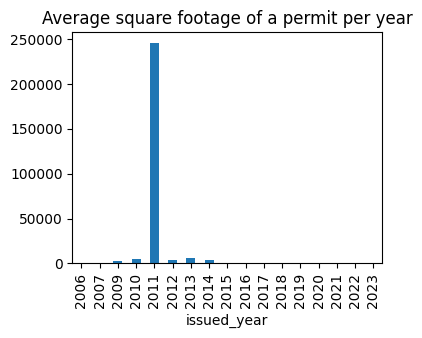

In [40]:
ave_sq_feet = permits.groupby(['issued_year'])['sq_feet'].mean()
ave_sq_feet.plot(kind = 'bar', title='Average square footage of a permit per year', figsize=(4, 3))

<Axes: title={'center': 'Average declared valuation per year'}, xlabel='issued_year'>

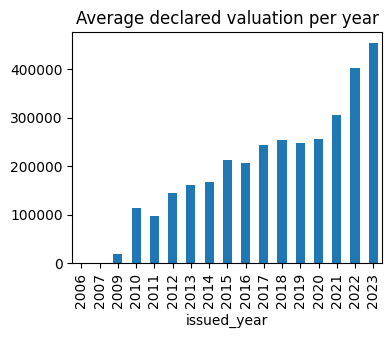

In [39]:
ave_val = permits.groupby(['issued_year'])['declared_valuation'].mean()
ave_val.plot(kind = 'bar', title='Average declared valuation per year', figsize=(4, 3))

<Axes: title={'center': 'Average declared valuation per zip code'}, xlabel='zip'>

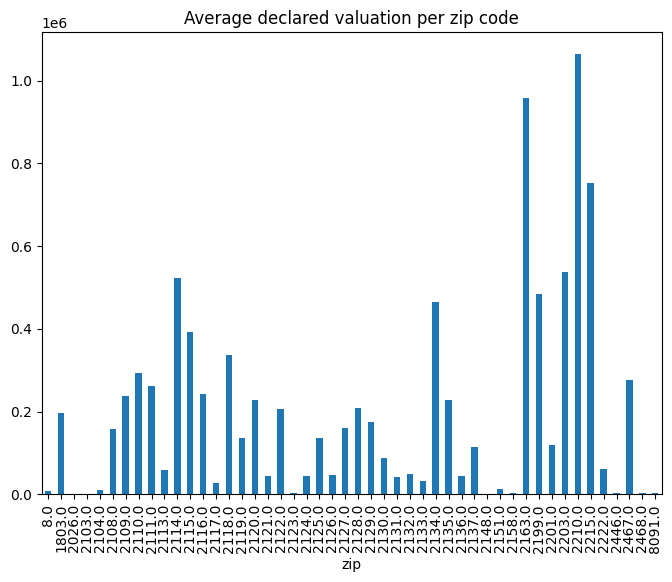

In [47]:
permits['zip'] = permits['zip'].astype(str)
permits['zip'] = permits['zip'].apply(lambda x: x[:5])
permits['zip'] = permits['zip'].astype(float)
val_per_zip = permits.groupby(['zip'])['declared_valuation'].mean()
val_per_zip.plot(kind = 'bar', title='Average declared valuation per zip code', figsize=(8, 6))